<a href="https://colab.research.google.com/github/Misha0714/portfolio/blob/main/Spiral_Distribution_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate X and y coordinates of spirally distributed blobs in two colors and plot the

 Display a scatter plot

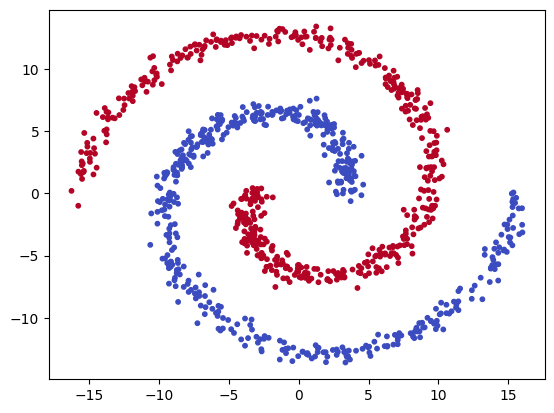

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# One Function to generate spirals with noise
def generate_spirals(n_samples, noise):
    x = np.zeros(n_samples)
    y = np.zeros(n_samples)
    labels = np.zeros(n_samples, dtype=int)
    #keep making datapoints for n_sample amount
    for i in range(n_samples):
      #making theta variable
        theta = np.random.uniform(0, 2 * np.pi)
      #add noise to
        noise_x = np.random.normal(0, noise)
        noise_y = np.random.normal(0, noise)

        if i < n_samples // 2:
            r = 2 * theta + np.pi
            labels[i] = 0  # Sprial 1
        else:
            r = -2 * theta - np.pi
            labels[i] = 1  # Spiral 2

        x[i] = r * np.cos(theta) + noise_x
        y[i] = r * np.sin(theta) + noise_y

    return x, y, labels

# Generate the data
n_samples = 1000  # You can adjust this number
noise = 0.5  # Adjust the noise level as needed
x, y, labels = generate_spirals(n_samples, noise)

# Visualize the data
plt.scatter(x, y, c=labels, cmap='coolwarm', marker='o', s=10)

Create Partitions with 70% of data set

In [ ]:
X = np.column_stack((x, y))  # Combine x and y coordinates
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, stratify=labels, random_state=2023)

Train the MLP Classifier

In [ ]:
# Create an MLP Classifier with your choice of parameters
model = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', max_iter=1000,
                      random_state=2023, learning_rate_init=0.01, solver='adam',
                      alpha=0.001, verbose=True)

# Train the MLP Classifier on the training data
model.fit(X_train, y_train)

Iteration 1, loss = 0.82482110
Iteration 2, loss = 0.65326197
Iteration 3, loss = 0.62956592
Iteration 4, loss = 0.58313556
Iteration 5, loss = 0.56050875
Iteration 6, loss = 0.52799733
Iteration 7, loss = 0.49234830
Iteration 8, loss = 0.44116715
Iteration 9, loss = 0.38993931
Iteration 10, loss = 0.33142143
Iteration 11, loss = 0.27664242
Iteration 12, loss = 0.21894803
Iteration 13, loss = 0.17364588
Iteration 14, loss = 0.12951305
Iteration 15, loss = 0.09892499
Iteration 16, loss = 0.07533622
Iteration 17, loss = 0.05532366
Iteration 18, loss = 0.04339793
Iteration 19, loss = 0.03489663
Iteration 20, loss = 0.02726798
Iteration 21, loss = 0.02363054
Iteration 22, loss = 0.01965259
Iteration 23, loss = 0.01699837
Iteration 24, loss = 0.01441064
Iteration 25, loss = 0.01302859
Iteration 26, loss = 0.01161447
Iteration 27, loss = 0.01075755
Iteration 28, loss = 0.00966539
Iteration 29, loss = 0.00916050
Iteration 30, loss = 0.00840687
Iteration 31, loss = 0.00760375
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate_init=0.01,
              max_iter=1000, random_state=2023, verbose=True)

Plot the lift curve

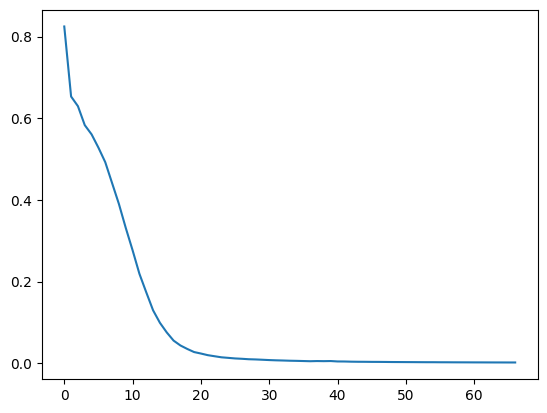

In [ ]:
# Plot the loss curve
plt.plot(model.loss_curve_)

Print the accuracy

In [ ]:
print("Accuracy on the test partition: ", model.score(X_test, y_test))

Accuracy on the test partition:  1.0


Plot the confusion matrix

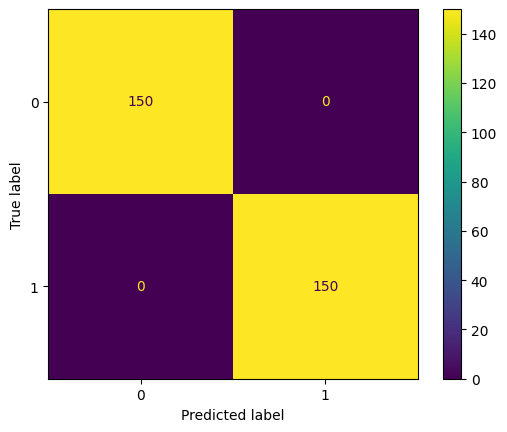

In [ ]:
ypred = model.predict(X_test)
cm = confusion_matrix(y_test, ypred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Plot decision boundary

a. Create a mesh of x and y coordinates that cover the entire field

b. You can make mesh .1 apart so you have 400x400

c. Reshape mesh grid to a dataframe that has 2 columns and 160000 rows

d. Then classify each point using trained model (model.predict)

e. plot both original data poinst and teh mesh data points. This generates the decision boundary as shown below

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


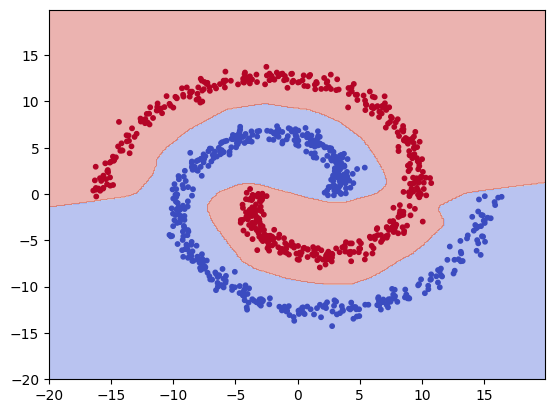

In [ ]:
# Create a mesh grid
X1 = np.arange(-20,20,.1)
X2 = np.arange(-20,20,.1)
X1, X2 = np.meshgrid(X1,X2)

# Reshape the mesh grid
X_decision = pd.DataFrame({'A':np.reshape(X1,160000), 'B':np.reshape(X2,160000)})

# Predict the class for each mesh point
mesh_predictions = model.predict(X_decision)

# Reshape predictions for plotting
mesh_predictions = mesh_predictions.reshape(X1.shape)


# Plot the decision boundary and original data points
plt.contourf(X1, X2, mesh_predictions, cmap='coolwarm', alpha=0.4)
plt.scatter(x, y, c=labels, cmap='coolwarm', marker='o', s=10)